<a href="https://colab.research.google.com/github/anubhavgupta1/Udacity/blob/main/Frameworks/Keras/AutoEncoder/MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Autoencoder

In [1]:
!ls
!apt-get install -y -qq software-properties-common python-software-properties module-init-tools
!add-apt-repository -y ppa:alessandro-strada/ppa 2>&1 > /dev/null
!apt-get update -qq 2>&1 > /dev/null
!apt-get -y install -qq google-drive-ocamlfuse fuse
from google.colab import auth
auth.authenticate_user()
from oauth2client.client import GoogleCredentials
creds = GoogleCredentials.get_application_default()
import getpass
!google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret} < /dev/null 2>&1 | grep URL
vcode = getpass.getpass()
!echo {vcode} | google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret}


!mkdir -p drive
!google-drive-ocamlfuse drive

import os
os.chdir("drive/Udacity/GDL/")
!ls

sample_data
E: Package 'python-software-properties' has no installation candidate
Selecting previously unselected package google-drive-ocamlfuse.
(Reading database ... 160975 files and directories currently installed.)
Preparing to unpack .../google-drive-ocamlfuse_0.7.24-0ubuntu1~ubuntu18.04.1_amd64.deb ...
Unpacking google-drive-ocamlfuse (0.7.24-0ubuntu1~ubuntu18.04.1) ...
Setting up google-drive-ocamlfuse (0.7.24-0ubuntu1~ubuntu18.04.1) ...
Processing triggers for man-db (2.8.3-2ubuntu0.1) ...
Please, open the following URL in a web browser: https://accounts.google.com/o/oauth2/auth?client_id=32555940559.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive&response_type=code&access_type=offline&approval_prompt=force
··········
Please, open the following URL in a web browser: https://accounts.google.com/o/oauth2/auth?client_id=32555940559.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0

In [2]:
import os

from utils.loaders import load_mnist
from models.AE import Autoencoder

In [3]:
!pwd

/content/drive/Udacity/GDL


In [4]:
!ls

data  models  run  scripts  utils


## Set parameters

In [5]:
# run params
SECTION = 'vae'
RUN_ID = '0001'
DATA_NAME = 'digits'
RUN_FOLDER = 'run/{}/'.format(SECTION)
RUN_FOLDER += '_'.join([RUN_ID, DATA_NAME])

if not os.path.exists(RUN_FOLDER):
    os.mkdir(RUN_FOLDER)
    os.mkdir(os.path.join(RUN_FOLDER, 'viz'))
    os.mkdir(os.path.join(RUN_FOLDER, 'images'))
    os.mkdir(os.path.join(RUN_FOLDER, 'weights'))

MODE =  'build' #'load' #

## Load the data

In [6]:
(x_train, y_train), (x_test, y_test) = load_mnist()

11493376/11490434 [==============================] - 0s 0us/step


## Define the structure of the neural network

In [7]:
AE = Autoencoder(
    input_dim = (28,28,1)
    , encoder_conv_filters = [32,64,64, 64]
    , encoder_conv_kernel_size = [3,3,3,3]
    , encoder_conv_strides = [1,2,2,1]
    , decoder_conv_t_filters = [64,64,32,1]
    , decoder_conv_t_kernel_size = [3,3,3,3]
    , decoder_conv_t_strides = [1,2,2,1]
    , z_dim = 2
)

if MODE == 'build':
    AE.save(RUN_FOLDER)
else:
    AE.load_weights(os.path.join(RUN_FOLDER, 'weights/weights.h5'))

In [8]:
for i in range(len(AE.encoder.layers)):
  layer = AE.encoder.layers[i]
  
  if 'encoder_output' in layer.name:
    print("\nLayer Number = {}, Layer Name = {}, \nInput = {} ,Weights = {}, Bias = {}, Output = {}".format(i+1,layer.name,layer.input_shape,
                                                                                                            layer.weights[0].shape,layer.weights[1].shape,layer.output_shape))
    continue

  if 'conv' not in layer.name:
    print("\nLayer Number = {}, Layer Name = {}, \nInput = {}, Output = {}".format(i+1, layer.name,layer.input_shape,layer.output_shape))
    continue

  stride_index = int(i/2)
  stride = AE.encoder_conv_strides[stride_index]
  print("\nLayer number = {}, Layer Name = {}, \nInput = {},Filter Name = {}, Filter Size = {}, Bias = {}, Stride = {}, Output = {}".format(i+1,layer.name,layer.input_shape,
                                                                                                                                            layer.kernel.name,layer.kernel.shape,
                                                                                                                                            layer.bias.shape,stride,
                                                                                                                                            layer.output_shape))


Layer Number = 1, Layer Name = encoder_input, 
Input = [(None, 28, 28, 1)], Output = [(None, 28, 28, 1)]

Layer number = 2, Layer Name = encoder_conv_0, 
Input = (None, 28, 28, 1),Filter Name = encoder_conv_0/kernel:0, Filter Size = (3, 3, 1, 32), Bias = (32,), Stride = 1, Output = (None, 28, 28, 32)

Layer Number = 3, Layer Name = leaky_re_lu, 
Input = (None, 28, 28, 32), Output = (None, 28, 28, 32)

Layer number = 4, Layer Name = encoder_conv_1, 
Input = (None, 28, 28, 32),Filter Name = encoder_conv_1/kernel:0, Filter Size = (3, 3, 32, 64), Bias = (64,), Stride = 2, Output = (None, 14, 14, 64)

Layer Number = 5, Layer Name = leaky_re_lu_1, 
Input = (None, 14, 14, 64), Output = (None, 14, 14, 64)

Layer number = 6, Layer Name = encoder_conv_2, 
Input = (None, 14, 14, 64),Filter Name = encoder_conv_2/kernel:0, Filter Size = (3, 3, 64, 64), Bias = (64,), Stride = 2, Output = (None, 7, 7, 64)

Layer Number = 7, Layer Name = leaky_re_lu_2, 
Input = (None, 7, 7, 64), Output = (None, 7, 7,

In [9]:
AE.encoder.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
encoder_input (InputLayer)   [(None, 28, 28, 1)]       0         
_________________________________________________________________
encoder_conv_0 (Conv2D)      (None, 28, 28, 32)        320       
_________________________________________________________________
leaky_re_lu (LeakyReLU)      (None, 28, 28, 32)        0         
_________________________________________________________________
encoder_conv_1 (Conv2D)      (None, 14, 14, 64)        18496     
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 14, 14, 64)        0         
_________________________________________________________________
encoder_conv_2 (Conv2D)      (None, 7, 7, 64)          36928     
_________________________________________________________________
leaky_re_lu_2 (LeakyReLU)    (None, 7, 7, 64)          0     

In [10]:
def stride_index(x):
  if x == 3 :
    return 0
  elif x == 5 :
    return 1
  elif x == 7 :
    return 2
  elif x == 9 :
    return 3

In [11]:
for i in range(len(AE.decoder.layers)):
  layer = AE.decoder.layers[i]
    
  if 'dense' in layer.name:
    print("\nLayer Number = {}, Layer Name = {}, \nInput = {} ,Weights = {}, Bias = {}, Output = {}".format(i+1,layer.name,layer.input_shape,
                                                                                                            layer.weights[0].shape,layer.weights[1].shape,layer.output_shape))
    continue


  if 'conv' not in layer.name:
    print("\nLayer Number = {}, Layer Name = {}, \nInput = {}, Output = {}".format(i+1, layer.name,layer.input_shape,layer.output_shape))
    continue

  #stride_index = int(i/2)
  stride = AE.encoder_conv_strides[stride_index(i)]
  print("\nLayer number = {}, Layer Name = {}, \nInput = {},Filter Name = {}, Filter Size = {}, Bias = {}, Stride = {}, Output = {}".format(i+1,layer.name,layer.input_shape,
                                                                                                                                            layer.kernel.name,layer.kernel.shape,
                                                                                                                                            layer.bias.shape,stride,
                                                                                                                                            layer.output_shape))


Layer Number = 1, Layer Name = decoder_input, 
Input = [(None, 2)], Output = [(None, 2)]

Layer Number = 2, Layer Name = dense, 
Input = (None, 2) ,Weights = (2, 3136), Bias = (3136,), Output = (None, 3136)

Layer Number = 3, Layer Name = reshape, 
Input = (None, 3136), Output = (None, 7, 7, 64)

Layer number = 4, Layer Name = decoder_conv_t_0, 
Input = (None, 7, 7, 64),Filter Name = decoder_conv_t_0/kernel:0, Filter Size = (3, 3, 64, 64), Bias = (64,), Stride = 1, Output = (None, 7, 7, 64)

Layer Number = 5, Layer Name = leaky_re_lu_4, 
Input = (None, 7, 7, 64), Output = (None, 7, 7, 64)

Layer number = 6, Layer Name = decoder_conv_t_1, 
Input = (None, 7, 7, 64),Filter Name = decoder_conv_t_1/kernel:0, Filter Size = (3, 3, 64, 64), Bias = (64,), Stride = 2, Output = (None, 14, 14, 64)

Layer Number = 7, Layer Name = leaky_re_lu_5, 
Input = (None, 14, 14, 64), Output = (None, 14, 14, 64)

Layer number = 8, Layer Name = decoder_conv_t_2, 
Input = (None, 14, 14, 64),Filter Name = decode

In [12]:
AE.decoder.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
decoder_input (InputLayer)   [(None, 2)]               0         
_________________________________________________________________
dense (Dense)                (None, 3136)              9408      
_________________________________________________________________
reshape (Reshape)            (None, 7, 7, 64)          0         
_________________________________________________________________
decoder_conv_t_0 (Conv2DTran (None, 7, 7, 64)          36928     
_________________________________________________________________
leaky_re_lu_4 (LeakyReLU)    (None, 7, 7, 64)          0         
_________________________________________________________________
decoder_conv_t_1 (Conv2DTran (None, 14, 14, 64)        36928     
_________________________________________________________________
leaky_re_lu_5 (LeakyReLU)    (None, 14, 14, 64)        0   

## Train the autoencoder

In [13]:
LEARNING_RATE = 0.0005
BATCH_SIZE = 32
INITIAL_EPOCH = 0

In [14]:
AE.compile(LEARNING_RATE)

In [15]:
AE.train(     
    x_train[:1000]
    , batch_size = BATCH_SIZE
    , epochs = 200
    , run_folder = RUN_FOLDER
    , initial_epoch = INITIAL_EPOCH
)

Epoch 1/200
32/32 [==============================] - 7s 178ms/step - loss: 0.2178

Epoch 00001: saving model to run/vae/0001_digits/weights/weights.h5
Epoch 2/200
32/32 [==============================] - 5s 167ms/step - loss: 0.1034

Epoch 00002: saving model to run/vae/0001_digits/weights/weights.h5
Epoch 3/200
32/32 [==============================] - 5s 166ms/step - loss: 0.0739

Epoch 00003: saving model to run/vae/0001_digits/weights/weights.h5
Epoch 4/200
32/32 [==============================] - 5s 165ms/step - loss: 0.0675

Epoch 00004: saving model to run/vae/0001_digits/weights/weights.h5
Epoch 5/200
32/32 [==============================] - 5s 161ms/step - loss: 0.0607

Epoch 00005: saving model to run/vae/0001_digits/weights/weights.h5
Epoch 6/200
32/32 [==============================] - 5s 167ms/step - loss: 0.0578

Epoch 00006: saving model to run/vae/0001_digits/weights/weights.h5
Epoch 7/200
32/32 [==============================] - 5s 163ms/step - loss: 0.0568

Epoch 00007

In [16]:
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import os
from scipy.stats import norm

from utils.loaders import load_model

## Load the model architecture

In [17]:
AE = load_model(Autoencoder, RUN_FOLDER)

## Reconstructing original paintings

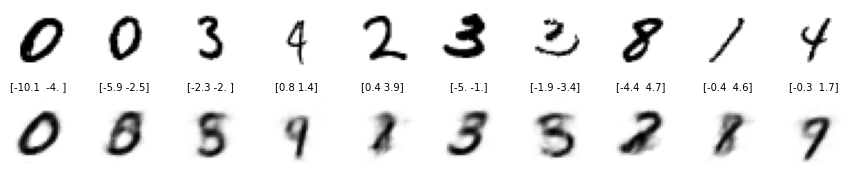

In [18]:
n_to_show = 10
example_idx = np.random.choice(range(len(x_test)), n_to_show)
example_images = x_test[example_idx]

z_points = AE.encoder.predict(example_images)

reconst_images = AE.decoder.predict(z_points)

fig = plt.figure(figsize=(15, 3))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

for i in range(n_to_show):
    img = example_images[i].squeeze()
    ax = fig.add_subplot(2, n_to_show, i+1)
    ax.axis('off')
    ax.text(0.5, -0.35, str(np.round(z_points[i],1)), fontsize=10, ha='center', transform=ax.transAxes)   
    ax.imshow(img, cmap='gray_r')

for i in range(n_to_show):
    img = reconst_images[i].squeeze()
    ax = fig.add_subplot(2, n_to_show, i+n_to_show+1)
    ax.axis('off')
    ax.imshow(img, cmap='gray_r')

## Mr N. Coder's wall

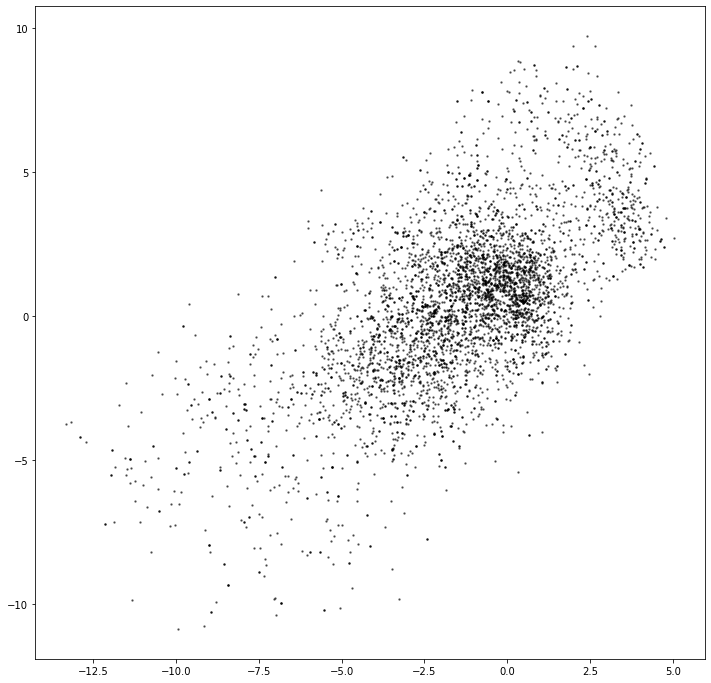

In [19]:
n_to_show = 5000
grid_size = 15
figsize = 12

example_idx = np.random.choice(range(len(x_test)), n_to_show)
example_images = x_test[example_idx]
example_labels = y_test[example_idx]

z_points = AE.encoder.predict(example_images)

min_x = min(z_points[:, 0])
max_x = max(z_points[:, 0])
min_y = min(z_points[:, 1])
max_y = max(z_points[:, 1])

plt.figure(figsize=(figsize, figsize))
plt.scatter(z_points[:, 0] , z_points[:, 1], c='black', alpha=0.5, s=2)
plt.show()

## The new generated art exhibition

X = (30,), Y = (30,), Z = (30, 2)


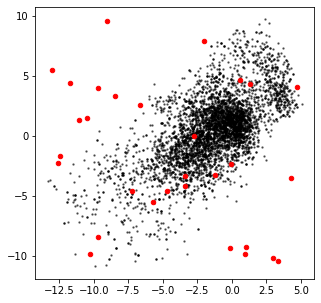

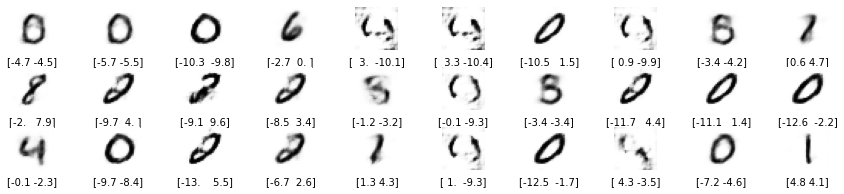

In [20]:
figsize = 5

plt.figure(figsize=(figsize, figsize))
plt.scatter(z_points[:, 0] , z_points[:, 1], c='black', alpha=0.5, s=2)

grid_size = 10
grid_depth = 3
figsize = 15

x = np.random.uniform(min_x,max_x, size = grid_size * grid_depth)
y = np.random.uniform(min_y,max_y, size = grid_size * grid_depth)
z_grid = np.array(list(zip(x, y)))

print("X = {}, Y = {}, Z = {}".format(x.shape,y.shape,z_grid.shape))

reconst = AE.decoder.predict(z_grid)

plt.scatter(z_grid[:, 0] , z_grid[:, 1], c = 'red', alpha=1, s=20)
plt.show()

fig = plt.figure(figsize=(figsize, grid_depth))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

for i in range(grid_size*grid_depth):
    ax = fig.add_subplot(grid_depth, grid_size, i+1)
    ax.axis('off')
    ax.text(0.5, -0.35, str(np.round(z_grid[i],1)), fontsize=10, ha='center', transform=ax.transAxes)
    
    ax.imshow(reconst[i, :,:,0], cmap = 'Greys')

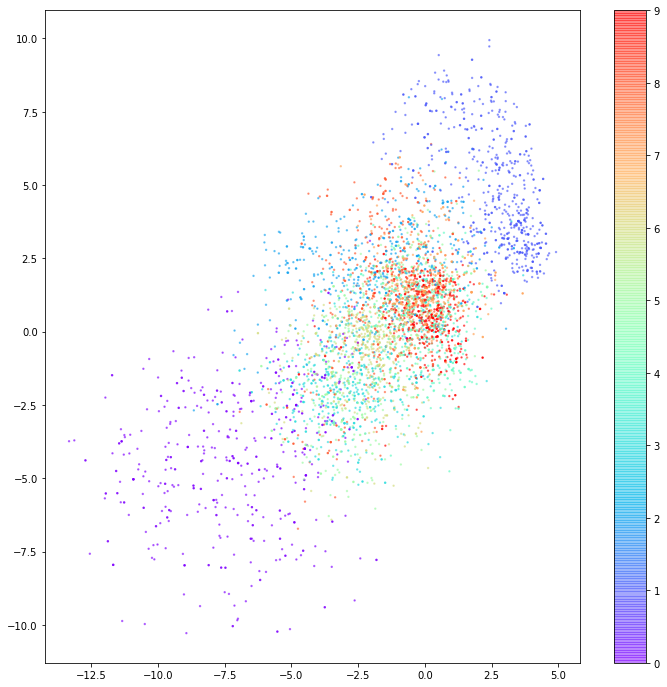

In [21]:
n_to_show = 5000
grid_size = 15
figsize = 12

example_idx = np.random.choice(range(len(x_test)), n_to_show)
example_images = x_test[example_idx]
example_labels = y_test[example_idx]

z_points = AE.encoder.predict(example_images)

plt.figure(figsize=(figsize, figsize))
plt.scatter(z_points[:, 0] , z_points[:, 1] , cmap='rainbow' , c= example_labels
            , alpha=0.5, s=2)
plt.colorbar()
plt.show()

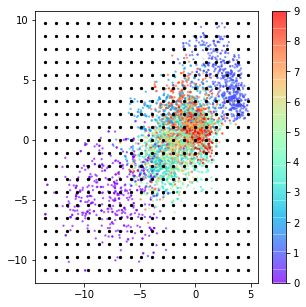

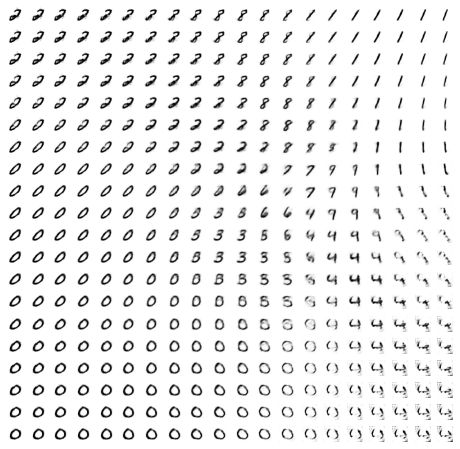

In [22]:
n_to_show = 5000
grid_size = 20
figsize = 8

example_idx = np.random.choice(range(len(x_test)), n_to_show)
example_images = x_test[example_idx]
example_labels = y_test[example_idx]

z_points = AE.encoder.predict(example_images)

plt.figure(figsize=(5, 5))
plt.scatter(z_points[:, 0] , z_points[:, 1] , cmap='rainbow' , c= example_labels
            , alpha=0.5, s=2)
plt.colorbar()

# x = norm.ppf(np.linspace(0.05, 0.95, 10))
# y = norm.ppf(np.linspace(0.05, 0.95, 10))
x = np.linspace(min(z_points[:, 0]), max(z_points[:, 0]), grid_size)
y = np.linspace(max(z_points[:, 1]), min(z_points[:, 1]), grid_size)
xv, yv = np.meshgrid(x, y)
xv = xv.flatten()
yv = yv.flatten()
z_grid = np.array(list(zip(xv, yv)))

reconst = AE.decoder.predict(z_grid)

plt.scatter(z_grid[:, 0] , z_grid[:, 1], c = 'black'#, cmap='rainbow' , c= example_labels
            , alpha=1, s=5)




plt.show()


fig = plt.figure(figsize=(figsize, figsize))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
for i in range(grid_size**2):
    ax = fig.add_subplot(grid_size, grid_size, i+1)
    ax.axis('off')
    ax.imshow(reconst[i, :,:,0], cmap = 'Greys')